In [51]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
from google.colab import files

In [ ]:
# Combine and clean datasets about EV Charging Station Count in Dallas

df_evcs = pd.read_csv("evcs_by_zip.csv")
df_evreg = pd.read_csv("Sept2022_EVRegistration.csv")
df_demo = pd.read_csv("Dallas_demographics_readyformodel.csv")

df_demo = df_demo.rename(columns={"Zip Code": "zip_code"})
df_evcs = df_evcs.rename(columns={"ZIP": "zip_code"})
df_evreg = df_evreg.rename(columns={"Zip Code": "zip_code"})

df = df_evcs.set_index('zip_code').join(df_demo.set_index('zip_code'))
df = df.join(df_evreg.set_index('zip_code'),lsuffix='_caller', rsuffix='_other')
df = df.drop(columns=['Unnamed: 0_caller', 'Unnamed: 0_other', 'Year'])
df = df.rename(columns={"count": "EV Charing Station Count", "Grand Total": "EV Registration Count"})[1:]
df = df.drop([75207.0])

df.to_csv('dallas_df.csv') 
files.download('dallas_df.csv')

In [53]:
df = pd.read_csv("dallas_df.csv")

df =  df.rename(columns={"EV Charing Station Count": "evcs_count",
                         "Current Population": "population",
                         "Average House Value ($)": "house_value",
                         "Average Income Per Household  ($)": "household_income",
                         "# Residential/Business Mailbox Ratio": "residential_business_ratio",
                         "EV Registration Count": "ev_registration_count"})

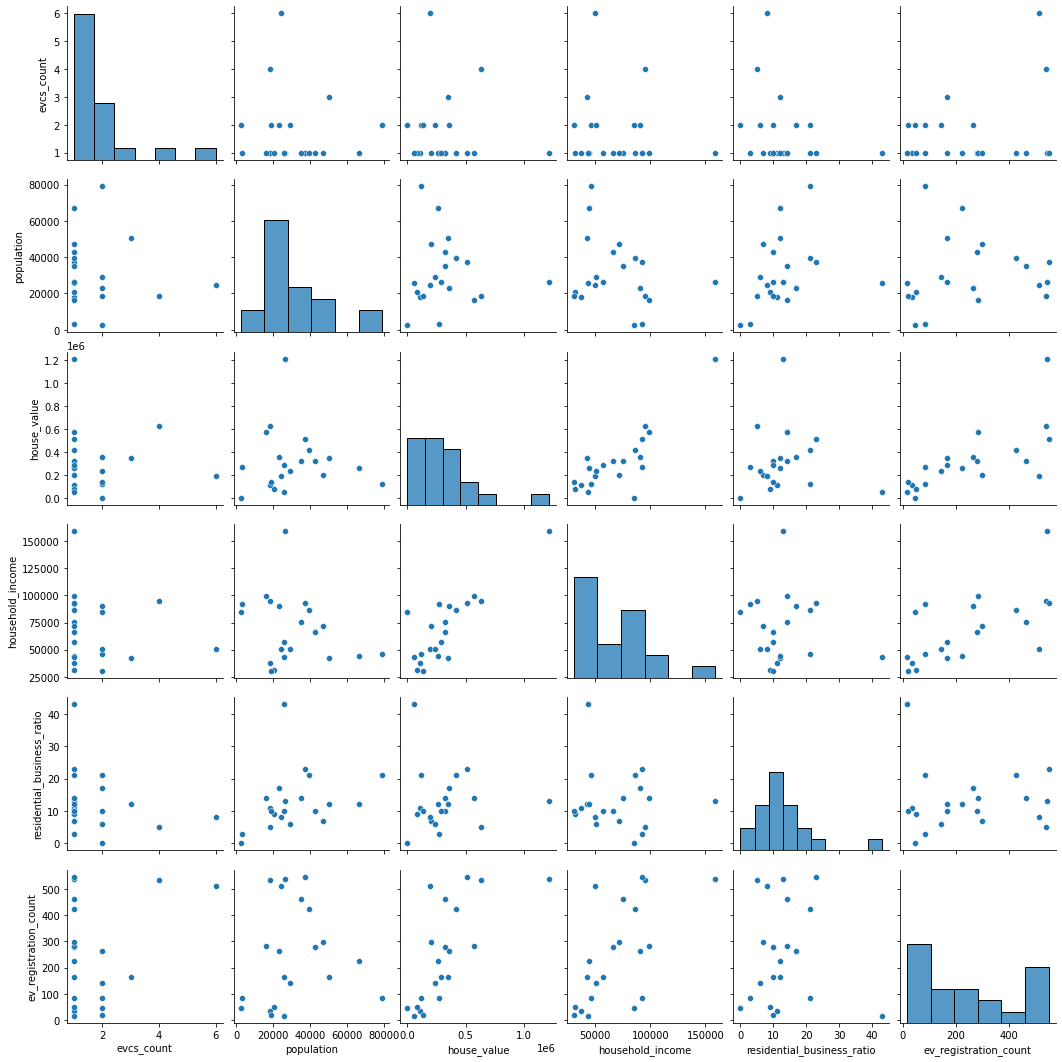

In [55]:
# Pairplot relationships among features and label

sns.pairplot(df.loc[:, 'evcs_count':])

In [33]:
# OLS Regression with EV Charging Station Count as the label

x = df.loc[:, df.columns != 'evcs_count']
y = df['evcs_count']
x = sm.add_constant(x)
result = sm.OLS(y, x).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             evcs_count   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     1.420
Date:                Sat, 05 Nov 2022   Prob (F-statistic):              0.275
Time:                        16:32:51   Log-Likelihood:                -29.321
No. Observations:                  21   AIC:                             72.64
Df Residuals:                      14   BIC:                             79.95
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [34]:
# OLS Regression with EV Registration Count as the label

x = df.loc[:, df.columns != 'ev_registration_count']
y = df['ev_registration_count']
x = sm.add_constant(x)
result = sm.OLS(y, x).fit()
print(result.summary())

                              OLS Regression Results                             
Dep. Variable:     ev_registration_count   R-squared:                       0.677
Model:                               OLS   Adj. R-squared:                  0.539
Method:                    Least Squares   F-statistic:                     4.892
Date:                   Sat, 05 Nov 2022   Prob (F-statistic):            0.00681
Time:                           16:32:53   Log-Likelihood:                -127.57
No. Observations:                     21   AIC:                             269.1
Df Residuals:                         14   BIC:                             276.4
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [50]:
# Customized OLS Regression with EV Charging Station as label without residential/business ratio as feature

res = smf.ols(formula='evcs_count ~ population * household_income * house_value * ev_registration_count', data=df).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             evcs_count   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     4.921
Date:                Sat, 05 Nov 2022   Prob (F-statistic):             0.0155
Time:                        16:43:27   Log-Likelihood:                -11.991
No. Observations:                  21   AIC:                             49.98
Df Residuals:                       8   BIC:                             63.56
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------